In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [4]:
monthly_report = pd.read_csv('monthly_report.csv')

In [5]:
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


In [6]:
#calculate and print sample_size:
sample_size = len(monthly_report)
print('sample size:')
print(sample_size)

#calculate and print num_purchased:
num_purchased = np.sum(monthly_report.purchase == 'y')
print("number of purchases:")
print(num_purchased)

sample size:
500
number of purchases:
41


In [8]:
#simulate one visitor:
one_visitor = np.random.choice(['y', 'n'], size=1, p=[0.1, 0.9])
print(one_visitor)

#simulate 10 visitors:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=10, p=[0.1, 0.9])
print(simulated_monthly_visitors)

['y']
['n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n']


In [9]:
#simulate 500 visitors:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])

#calculate the number of simulated visitors who made a purchase:
num_purchased = np.sum(simulated_monthly_visitors == 'y')
print(num_purchased)

46


In [10]:
null_outcomes = []

#start for loop here:
for i in range(10000):
  simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])

  num_purchased = np.sum(simulated_monthly_visitors == 'y')

  null_outcomes.append(num_purchased)

#calculate the minimum and maximum values in null_outcomes here:
null_min = np.min(null_outcomes) 
print(null_min) 

null_max = np.max(null_outcomes)
print(null_max)

28
79


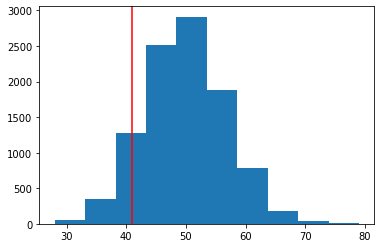

In [11]:
plt.hist(null_outcomes)
plt.axvline(41, color = 'r')
plt.show()

In [12]:
null_90CI = np.percentile(null_outcomes, [5,95])
print(null_90CI)

[39. 61.]


In [13]:
#calculate 1-sided p-value
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41)/len(null_outcomes) 
print(p_value)

0.0967


In [14]:
#calculate the 2-sided p-value:
null_outcomes = np.array(null_outcomes)
p_value = np.sum((null_outcomes <= 41) | (null_outcomes >= 59))/len(null_outcomes) 
print(p_value)

0.1992


In [15]:
def simulation_binomial_test(observed_successes, n, p):
  #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  
  #return the p-value
  return p_value

In [16]:
#Test the function (compared to scipy)
p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)


from scipy.stats import binom_test
p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

simulation p-value:  0.2556
binom_test p-value:  0.25468926056232155


In [17]:
#redefine the function to accept different alternative hypotheses
def simulation_binomial_test(observed_successes, n, p, alternative_hypothesis):
  #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  null_outcomes = np.array(null_outcomes)

  if alternative_hypothesis == 'less':
    p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
  elif alternative_hypothesis == 'greater':
    p_value = np.sum(null_outcomes >= observed_successes)/len(null_outcomes)
  else:
    difference = np.abs(p*n - observed_successes)
    upper = p*n + difference
    lower = p*n - difference
    p_value = np.sum((null_outcomes >= upper) | (null_outcomes <= lower))/len(null_outcomes)
  
  #return the p-value
  return p_value

In [18]:
#Test the function:
print('lower tail one-sided test:')
p_value1 = simulation_binomial_test(45, 500, .1, alternative_hypothesis = 'less')
print("simulation p-value: ", p_value1)

p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

print('upper tail one-sided test:')
p_value1 = simulation_binomial_test(53, 500, .1, alternative_hypothesis = 'greater')
print("simulation p-value: ", p_value1)

p_value2 = binom_test(53, 500, .1, alternative = 'greater')
print("binom_test p-value: ", p_value2)

print('two-sided test:')
p_value1 = simulation_binomial_test(42, 500, .1, alternative_hypothesis = 'not_equal')
print("simulation p-value: ", p_value1)

p_value2 = binom_test(42, 500, .1)
print("binom_test p-value: ", p_value2)

lower tail one-sided test:
simulation p-value:  0.2556
binom_test p-value:  0.25468926056232155
upper tail one-sided test:
simulation p-value:  0.3504
binom_test p-value:  0.3483811994999115
two-sided test:
simulation p-value:  0.2578
binom_test p-value:  0.26313834687316334
